## Importing and prepping data

In [17]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []
remote_folder = 'Gel_Studies/08_14_18_gel_validation' #Folder in AWS S3 containing files to be analyzed
bucket = 'ccurtis.data'
vids = 10
sizes = ['100', '200', '500']
nonnum = ['Particle Size', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity']
featofvar = 'Particle Size'

counter = 0
for size in sizes:
    for num in range(1, vids+1):
        try:
            filename = 'features_{}nm_XY{}.csv'.format(size, '%02d' % num)
            aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name='ccurtis.data')
            fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
            print('{} size: {}'.format(filename, fstats.shape))
            fstats['Particle Size'] = pd.Series(fstats.shape[0]*[size], index=fstats.index)
            fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
            counter = counter + 1
            if counter == 1:
                fstats_tot = fstats
            else:
                fstats_tot = fstats_tot.append(fstats, ignore_index=True)
        except:
            print('skip filename {}'.format(filename))

skip filename features_100nm_XY01.csv
features_100nm_XY02.csv size: (18207, 67)
features_100nm_XY03.csv size: (18178, 67)
features_100nm_XY04.csv size: (20452, 67)
features_100nm_XY05.csv size: (19292, 67)
skip filename features_100nm_XY06.csv
skip filename features_100nm_XY07.csv
skip filename features_100nm_XY08.csv
features_100nm_XY09.csv size: (21766, 67)
skip filename features_100nm_XY10.csv
features_200nm_XY01.csv size: (6072, 67)
features_200nm_XY02.csv size: (6483, 67)
features_200nm_XY03.csv size: (6513, 67)
features_200nm_XY04.csv size: (6412, 67)
features_200nm_XY05.csv size: (5249, 67)
features_200nm_XY06.csv size: (5248, 67)
features_200nm_XY07.csv size: (4674, 67)
features_200nm_XY08.csv size: (5585, 67)
features_200nm_XY09.csv size: (5700, 67)
features_200nm_XY10.csv size: (5198, 67)
features_500nm_XY01.csv size: (5325, 67)
features_500nm_XY02.csv size: (4709, 67)
features_500nm_XY03.csv size: (4125, 67)
features_500nm_XY04.csv size: (1606, 67)
features_500nm_XY05.csv si

In [3]:
nonnum = ['Particle Size', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y', 'Quality',
          'Mean_Intensity', 'SN_Ratio', 'Mean X', 'Std X', 'Mean Y', 'Std Y', 'Mean Quality', 'Std Quality', 'Mean SN_Ratio',
          'Std SN_Ratio', 'binx', 'biny', 'bins', 'index']

## Train-Test Split

In [4]:
bins = list(range(0, 2048+1, 256))
fstats_tot['binx'] = pd.cut(fstats_tot.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
fstats_tot['biny'] = pd.cut(fstats_tot.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
fstats_tot['bins'] = 8*fstats_tot['binx'] + fstats_tot['biny']
fstats_tot = fstats_tot[np.isfinite(fstats_tot.bins)]
fstats_tot.bins = fstats_tot.bins.astype(int)

In [5]:
# cols = fstats_tot.columns.tolist()
# cols = cols[-3:] + cols[:-3]
# pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [6]:
featofvar = 'Particle Size'
#ncomp = 15

# X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
# X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
# y_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))][featofvar].values
# y_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))][featofvar].values

f_train = fstats_tot[fstats_tot.bins.isin(checkerboard(8))].reset_index()
f_test = fstats_tot[~fstats_tot.bins.isin(checkerboard(8))].reset_index()

# for run in range(1):
#     clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
#                         alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
#                         early_stopping=True, validation_fraction=0.1)

#     clf.fit(X_train, y_train)
    
#     print('Training Results')
#     y_true1, y_pred1 = y_train, clf.predict(X_train)
#     print(classification_report(y_true1, y_pred1, digits=4))
    
#     print('Test Results')
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test)
#     print(classification_report(y_true, y_pred, digits=4))

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [7]:
pca_train = pca.pca_analysis(f_train, dropcols=nonnum, n_components=11)

Cumulative explained variance:
0 component: 0.3055686893826106
1 component: 0.4587577116083882
2 component: 0.5374784172558745
3 component: 0.5961905944052582
4 component: 0.6379705766860195
5 component: 0.6753641999842299
6 component: 0.711034921503423
7 component: 0.7408411649978948
8 component: 0.7656410136637608
9 component: 0.7900320970796871
10 component: 0.8130863725375133


In [28]:
pca_train.final.head()

,index,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,...,1,2,3,4,5,6,7,8,9,10
0,0,0.0,0.103784,25.097851,2.088481,0.511420,0.407539,0.092759,1.785844,0.440041,...,-0.426260,2.613535,-1.021871,1.569850,-0.212451,0.483439,-0.947771,-0.581297,-0.710161,-0.144869
1,2,2.0,1.695633,0.443023,3.252321,0.732765,0.278525,0.173424,1.521683,0.342833,...,-0.731729,-0.450630,0.240195,0.236924,0.297978,-0.809049,0.914832,0.212252,1.442574,0.247402
2,4,4.0,1.515761,1.227798,1.888773,0.918764,0.145528,0.326005,2.175150,0.540262,...,0.326929,-1.739359,1.101259,-1.332071,-0.245624,-0.449300,1.130521,-0.088031,0.134676,0.102475
3,6,6.0,2.017516,0.203120,2.542219,0.986765,0.057714,0.505547,4.368592,0.771093,...,1.466548,-3.156006,0.152636,-0.051904,0.116358,0.197120,0.430740,0.544136,1.474003,0.522187
4,7,7.0,0.015287,0.144257,4.233687,0.105988,0.713302,0.014100,1.530018,0.346413,...,-3.120733,3.652937,0.941785,2.001520,-1.713388,-0.625699,1.507182,4.040324,0.517250,0.487877


In [14]:
pca_test = pca.pca_analysis(f_test, dropcols=nonnum, n_components=11, existing_model=True, model_file=pca_train)

In [15]:
pca_test.final.head()

,index,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,...,1,2,3,4,5,6,7,8,9,10
0,1,1.0,1.116775,3.850957,3.258689,0.927007,0.137646,0.338687,2.674378,0.626081,...,0.969420,-1.872964,-0.980980,0.677674,1.185886,-0.277186,-0.814458,0.040805,-0.702247,-0.750771
1,3,3.0,0.012209,0.357217,4.563341,0.058811,0.780798,0.007605,1.424378,0.297939,...,-3.551591,4.772095,-0.063181,3.618805,0.518623,3.003055,0.666055,3.664944,1.597665,3.329592
2,5,5.0,0.436287,17.615899,1.987576,0.864761,0.190551,0.262831,1.966836,0.491569,...,-1.099829,-0.137135,0.999278,-0.150309,-1.618423,1.042066,-0.287439,-0.243227,0.867815,0.427149
3,10,10.0,1.560015,2.839630,2.640906,0.778888,0.249782,0.198655,1.750309,0.428672,...,0.504358,-2.581957,-1.346359,-0.332125,2.757286,-1.908399,-0.212658,-0.780638,0.589967,-2.473951
4,11,11.0,1.159226,8.550680,1.443883,0.959947,0.101089,0.405328,1.804818,0.445928,...,-0.425048,-2.198110,0.875944,-0.549754,-0.708501,0.156144,0.205510,-0.554484,1.587301,-0.532954


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [18]:
kmostat = pca.kmo(pca_train.scaled)

0.919343403884


## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [25]:
import numpy as np
#ncomp = 11
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pca_train.final[pca_train.final['Particle Size']=='100'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pca_train.final[pca_train.final['Particle Size']=='200'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pca_train.final[pca_train.final['Particle Size']=='500'].values[:, -ncomp:], axis=0)

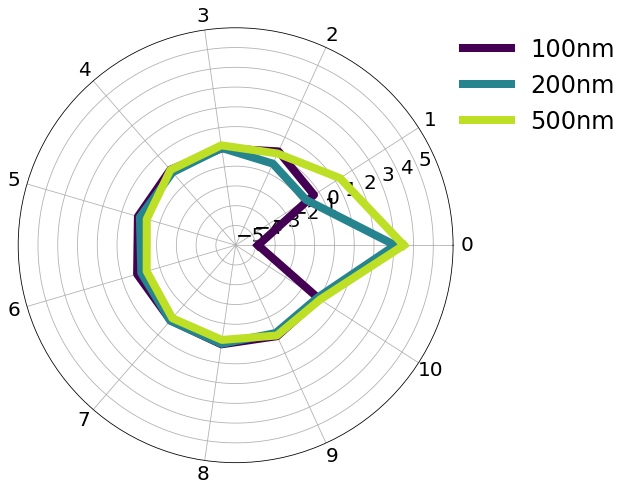

In [26]:
pca.plot_pca(dicti, savefig=True, labels=['100nm', '200nm', '500nm'], rticks=np.linspace(-5, 5, 11))

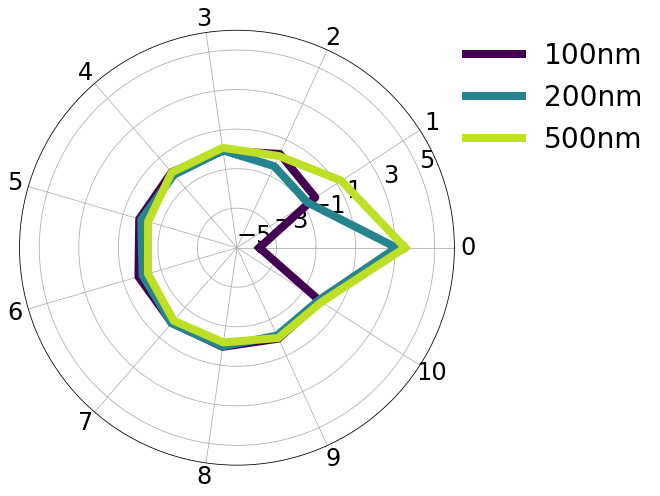

In [28]:
pca.plot_pca(dicti, savefig=True, labels=['100nm', '200nm', '500nm'], rticks=np.linspace(-5, 5, 6), dpi=1200, labelsize=24,
             filename='pics/Fig1/size_pcaavg.png')

In [30]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
def feature_violin(df, label='label', lvals=['yes', 'no'], fsubset=3, **kwargs):
    """Creates violinplot of input feature dataset

    Designed to plot PCA components from pca_analysis.

    Parameters
    ----------
    df : pandas.core.frames.DataFrame
        Must contain a group name column, and numerical feature columns.
    label : string or int
        Name of group column.
    lvals : list of string or int
        All values that group column can take
    fsubset : int or list of int
        Features to be plotted. If integer, will plot range(fsubset).
        If list, will only plot features contained in fsubset.
    **kwargs : variable
        figsize : tuple of int or float
            Dimensions of output figure
        yrange : list of int or float
            Range of y axis
        xlabel : string
            Label of x axis
        labelsize : int or float
            Font size of x label
        ticksize : int or float
            Font size of y tick labels
        fname : None or string
            Name of output file
        legendfontsize : int or float
            Font size of legend
        legendloc : int
            Location of legend in plot e.g. 1, 2, 3, 4

    """

    defaults = {'figsize': (12, 5), 'yrange': [-20, 20], 'xlabel': 'Feature',
                'labelsize': 20, 'ticksize': 16, 'fname': None,
                'legendfontsize': 12, 'legendloc': 1}

    for defkey in defaults.keys():
        if defkey not in kwargs.keys():
            kwargs[defkey] = defaults[defkey]

    # Restacking input data
    groupsize = []
    featcol = []
    valcol = []
    feattype = []

    if isinstance(fsubset, int):
        frange = range(fsubset)
    else:
        frange = fsubset

    for feat in frange:
        groupsize.extend(df[label].values)
        featcol.extend([feat]*df[label].values.shape[0])
        valcol.extend(df[feat].values)

    to_violind = {'label': groupsize, 'Feature': featcol,
                  'Feature Value': valcol}
    to_violin = pd.DataFrame(data=to_violind)

    # Plotting function
    fig, ax = plt.subplots(figsize=kwargs['figsize'])
    sns.violinplot(x="Feature", y="Feature Value", hue="label", data=to_violin,
                   palette=cm.viridis(np.linspace(0, 0.9, 3)), hue_order=lvals,
                   figsize=kwargs['figsize'], linewidth=0)

    # kwargs
    ax.tick_params(axis='both', which='major', labelsize=kwargs['ticksize'])
    plt.xlabel('Feature', fontsize=kwargs['labelsize'])
    plt.ylabel('Normalized\nFeature Space', fontsize=kwargs['labelsize'])
    plt.ylim(kwargs['yrange'])
    plt.legend(loc=kwargs['legendloc'], prop={'size': kwargs['legendfontsize']})
    plt.setp(ax.collections, alpha=.75)
    if kwargs['fname'] is None:
        plt.show()
    else:
        plt.savefig(kwargs['fname'], dpi=1200, pad_inches=0.22)

    return to_violin

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm

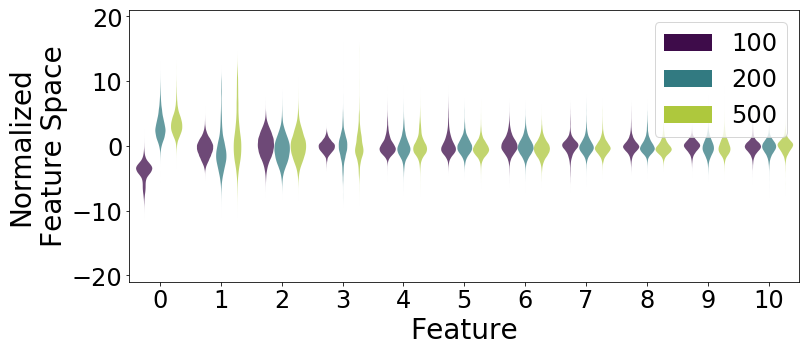

In [33]:
labels=['100', '200', '500']
feats = feature_violin(pca_train.final, label='Particle Size', lvals=labels, fsubset=11, yrange=[-21, 21],
                       legendfontsize=24, labelsize=28, ticksize=24, fname='./pics/Fig1/size_pcadist.png')

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

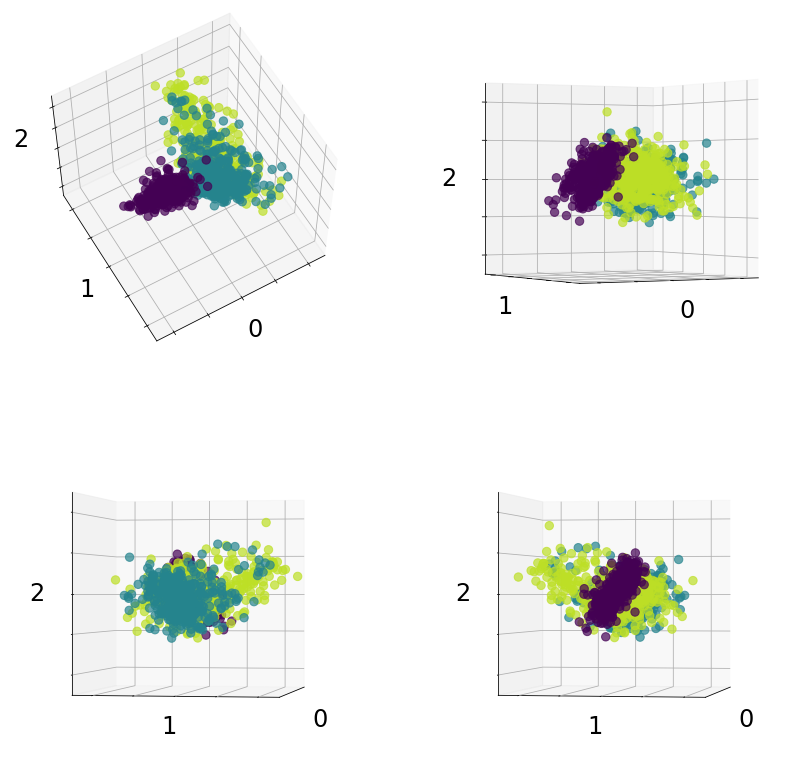

In [34]:
labels=['100', '200', '500']
fstats1 = pca.feature_plot_3D(pca_train.final, label='Particle Size', lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12], legendfontsize=24, labelfontsize=24, dpi=1600,
                              ticksize=20,
                              filename='./pics/Fig1/size_3feats.png')

In [ ]:
ncomp = 14
trainp = np.array([])
testp = np.array([])

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Particle Size', labels, equal_sampling=True,
                                       tsize=500, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Particle Size'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

In [ ]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

In [ ]:
fstats_num

## Neural Network

In [35]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [36]:
X_train = pca_train.final.values[:, -ncomp:]
X_test = pca_test.final.values[:, -ncomp:]
y_train = pca_train.final[featofvar].values
y_test = pca_test.final[featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.24154667
Validation score: 0.922169
Iteration 2, loss = 0.18840238
Validation score: 0.934719
Iteration 3, loss = 0.17443705
Validation score: 0.935937
Iteration 4, loss = 0.16604500
Validation score: 0.939964
Iteration 5, loss = 0.15940326
Validation score: 0.944554
Iteration 6, loss = 0.15454459
Validation score: 0.937436
Iteration 7, loss = 0.15082251
Validation score: 0.949799
Iteration 8, loss = 0.14644210
Validation score: 0.949049
Iteration 9, loss = 0.14242811
Validation score: 0.946240
Iteration 10, loss = 0.13934113
Validation score: 0.940526
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 11, loss = 0.12733380
Validation score: 0.954107
Iteration 12, loss = 0.12535104
Validation score: 0.955699
Iteration 13, loss = 0.12452102
Validation score: 0.953451
Iteration 14, loss = 0.12369718
Validation score: 0.956542
Iteration 15, loss = 0.12256097
Validation score: 0.955418
Iterat